# k-NN Project 1: `iris` Classification

This data is from `sklearn.datasets`. This dataset consists of 3 different types of irises' petal / sepal length / width, stored in a $150\times4$ `numpy.ndarray`. We already explored the dataset briefly in the previous chapter. This time we will try to use the feature provided to predict the type of the irises. For the purpose of plotting, we will only use the first two features: `sepal length` and `sepal width`.

## Explore the dataset
We first load the dataset. 


In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

Then we would like to split the dataset into trainning data and test data. Here we are going to use `sklearn.model_selection.train_test_split` function. Besides the dataset, we should also provide the propotion of the test set comparing to the whole dataset. We will choose `0.1` here, which means that the size of the test set is 0.1 times the size of the whole dataset. 

The split will be randomly. You may set the argument `random_state` to be a certain number to control the random process. If you set a `random_state`, the result of the random process will stay the same. This is for reproducible output across multiple function calls.

After we get the training set, we should also normalize it. All our normalization should be based on the training set. When we want to use our model on some new data points, we will use the same normalization parameters to normalize the data points in interests right before we apply the model. Here since we mainly care about the test set, we could normalize the test set at this stage.

In [2]:
from sklearn.model_selection import train_test_split
from assests.codes.knn import encodeNorm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

Before we start to play with k-NN, let us look at the data first. Since we only choose two features, it is able to plot these data points on a 2D plane, with different colors representing different classes. 


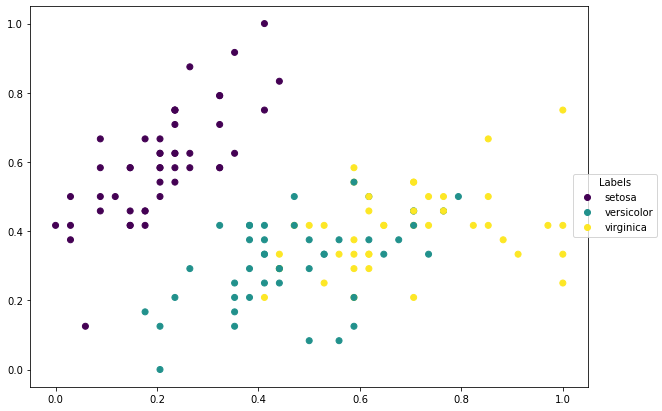

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot.
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train)

# Generate legends.
labels = ['setosa', 'versicolor', 'virginica']
fig.legend(handles=scatter.legend_elements()[0], labels=labels,
           loc="right", title="Labels")

plt.show()

## Apply our k-NN model

Now let us apply k-NN to this dataset. We first use our codes. Here I use `from assests.codes.knn` to import our functions since I put all our functions in `./assests/codes/knn.py`. Then the poential code is 
```python
y_pred = classify_kNN(X_test, X_train, y_train, k=10)
```

Note that the above code is actually wrong. The issue ist that our function `classify_kNN` can only classify one row of data. To classify many rows, we need to use a `for` loop. 


In [4]:
from assests.codes.knn import classify_kNN

n_neighbors = 10
y_pred = list()
for row in X_test_norm:
    row_pred = classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
    y_pred.append(row_pred)
y_pred = np.array(y_pred)

We could use list comprehension to simply the above codes. 

In [5]:
from assests.codes.knn import classify_kNN

n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

This `y_pred` is the result we got for the test set. We may compare it with the real answer `y_test`, and calcuate the error rate.

In [6]:
errorrate = np.mean(y_pred != y_test)
print(errorrate)

0.4


## Apply k-NN model from `sklearn`

Now we would like to use `sklearn` to reproduce this result. Since our data is prepared, what we need to do is directly call the functions.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10
clf = KNeighborsClassifier(n_neighbors, weights="uniform", metric="euclidean",
                           algorithm='brute')
clf.fit(X_train_norm, y_train)
y_pred_sk = clf.predict(X_test_norm)

errorrate = np.mean(y_pred_sk != y_test)
print(errorrate)

0.4


## Visualize the Decision boundary
Using the classifier we get above, we are able to classify every points on the plane. This enables us to draw the following plot, which is called the Decision boundary. It helps us to visualize the relations between features and the classes.

We use `DecisionBoundaryDisplay` from `sklearn.inspection` to plot the decision boundary. The function requires us to have a fitted classifier. We may use the classifier `clf` we got above. Note that this classifier should have some build-in structures that our `classify_kNN` function doesn't have. We may rewrite our codes to make it work, but this goes out of the scope of this section. This is supposed to be Python programming exercise. We will talk about it in the future if we have enough time.

We first plot the dicision boundary using `DecisionBoundaryDisplay.from_estimator`. Then we plot the points from `X_test_norm`. From the plot it is very clear which points are misclassified.

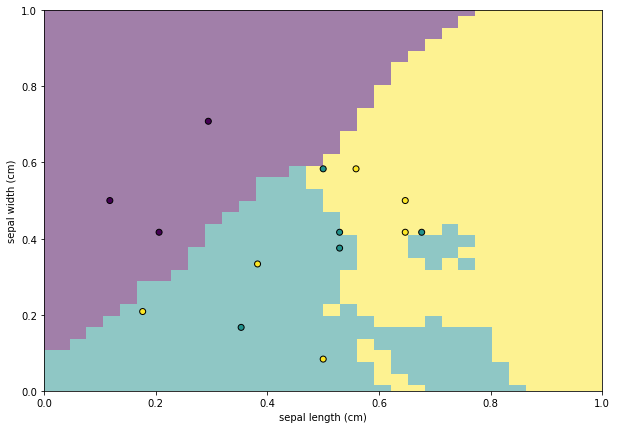

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
            clf, 
            X_train_norm,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
            alpha=0.5
    )
disp.ax_.scatter(X_test_norm[:, 0], X_test_norm[:, 1], c=y_test, edgecolor="k")
disp.figure_.set_size_inches((10,7))
_, _ = disp.ax_.set_xlim(0, 1)
_, _ = disp.ax_.set_ylim(0, 1)

Note that using this approach the features in the plot are normalized, since we perform the normalization process outside the classifier. Again this can be solve by rewrite our codes, which will be discussed when we have time.

## Choosing a `k` value
In the previous example we choose `k` to be `10` as an example. To choose a `k` value we usually run some test by trying different `k` and choose the one with the best result. In other case the best result means that smallest error rate. For simplicity we only use `sklearn`.

In [9]:
minK = 1
maxK = 80
errorrate = list()
for i in range(minK, maxK+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_norm, y_train)
    pred_i = clf.predict(X_test_norm)
    errorrate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

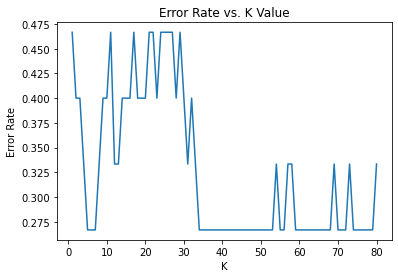

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(minK, maxK+1), errorrate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')